<a href="https://colab.research.google.com/github/kitkate8/BioPhysHW/blob/main/Homework/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Suppose a species of bird in the John Heinz Wildlife Refuge (here in Philly!) has a population that is modeled by the Verhulst (or logistic function) model with a growth rate r, carrying capacity K, and time t measured in years. Write down an adjusted model equation to account for each of the following situations. What do these each of these adjusted models predict for the longterm behavior of the bird population if r=0.3 and K=2500 and how do they differ?

a. 100 birds are relocated to other refuges each year

Write your adjusted model here:

Text(0, 0.5, 'bird population')

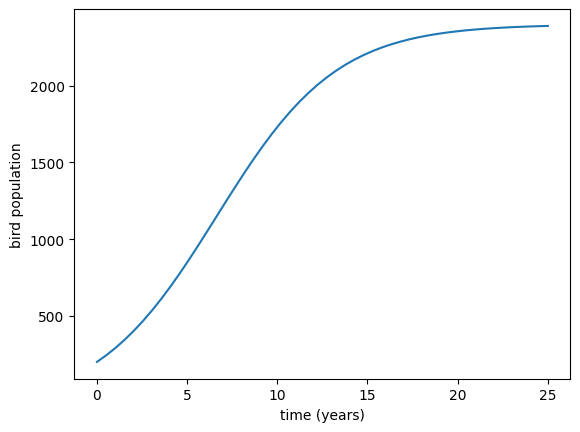

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 25)
# to account for moving birds subtract 100 from the population:
x = (2500 * 300 * np.exp(0.3 * t))/(2500 + 300*(np.exp(0.3 * t) - 1)) - 100
# I used an initial population of 300 birds

plt.plot(t, x, label="100 birds relocated")
plt.xlabel("time (years)")
plt.ylabel("bird population")

b. One-third of the bird population is relocated to other refuges each year.


Write your adjusted model here:

Text(0, 0.5, 'bird population')

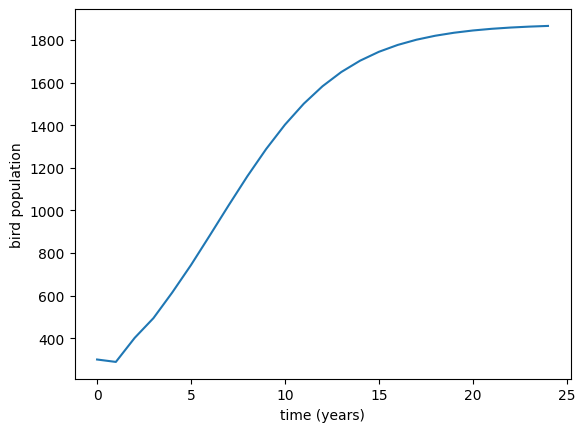

In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 25)
pop = [300]
for i in range(1, 25):
  x = ((2500 * 300 * np.exp(0.3 * i))/(2500 + 300*(np.exp(0.3 * i) - 1))) - (1/3) * pop[i - 1]
  pop.append(x)
plt.plot(t, pop, label="1/3 birds relocated")
plt.xlabel("time (years)")
plt.ylabel("bird population")

c. The number of birds relocated each year is proportional to the square root of the number of bird in the John Heinz refuge.


Write your adjusted model here:

Text(0, 0.5, 'bird population')

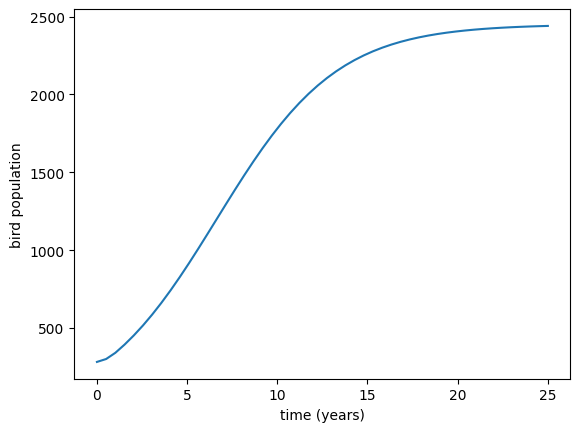

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 25)
relocated = np.sqrt(x)
x = ((2500 * 300 * np.exp(0.3 * t))/(2500 + 300*(np.exp(0.3* t) - 1))) - relocated

plt.plot(t, x, label="sqrt birds relocated")
plt.xlabel("time (years)")
plt.ylabel("bird population")

How do the longterm behaviors of each adjusted model compare/differ? Answer here:

The model where 1/3 are relocated reaches capacity the latest (~25 years), and the other two reach capacity around the same time (~ 15 years). All of the models have the same general curve shape.

2. You are running an experiment where you are culturing some bacteria from your backyard. You grab some samples, put them in a petri dish, and give them some food. You then come back every day at the same time to count the number of bacteria that you see (pretend like you can do this). The following chart represents the data you've gathered. 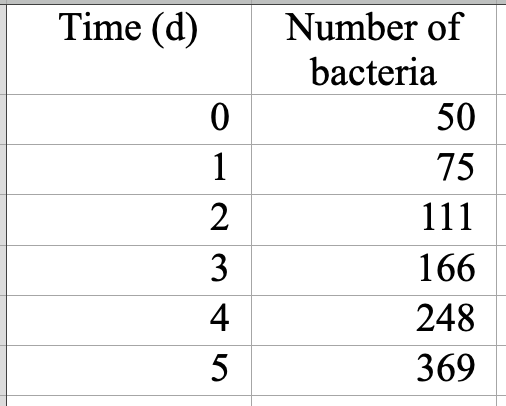

a. Calculate the growth rate, $R$, for this population assuming exponential growth (include appropriate units).

In [ ]:
# r = 0.49
# used formula x(t) = X0 * (1 + r)^t and rearranged using values given in table

b. Write code that calculates the population size after 25 days

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = 50 * (1 + 0.49)**(25)
print(x)



1068136.3985678102


3. In the following predator-prey population models, x represents the prey, and y represents the predators.

(1) $\frac{dx}{dt}=5x-3xy$, $\frac{dy}{dt}=-2y+\frac{1}{2}xy$

(2) $\frac{dx}{dt}=x-8xy$, $\frac{dy}{dt}=-2y+6xy$

a. In which system does the prey reproduce more quickly when there are no predators and equal
numbers of prey?

System 1, since the growth rate of prey is 5, compared to 1 in system 2

b. In which system are the predators more successful at catching prey? In other words, if the number of predators and prey are equal for the two system, in which system do the predators have a greater effect on the rate of change of the prey?

the predators are more succesful in system 2, where the predation rate is 8 compared to 3 in system 1

c. Which system requires more prey for the predators to achieve a given growth rate (assuming identical number of predators in both cases)?

system one requires more prey because the growth rate of predators in the precense of prey is smaller, so more prey are needed to increase the overall growth rate.

4. Modify the simple predator-prey model to assume that in the absence of
predators the prey population  follows a logistic, rather than exponential,
growth model. Write down the modified equations and compare the plots of the simple predator-prey equations to your modified ones for the same parameters. What do you notice the difference is? Why?

Text(0, 0.5, '# of animals')

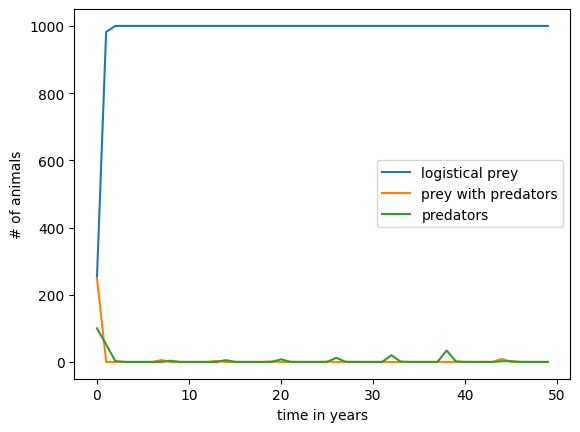

In [16]:


from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

r = 5     #growth rate of prey
K = 1000  # carrying capacity
r2 = 2    #death rate of predators
r3 = 3    #rate of predation
r4 = 4    #growth rate of predators
X0 = np.array([250, 100]) # number of prey and predators

time = np.linspace(0, 50)

def log(a, b, c_, d, K):
      def dX_dt(Y, t=0):
        prey = Y[0]
        dPrey_dt = a * prey * (1 - prey/K)
        return [dPrey_dt]
      X, _ = integrate.odeint(dX_dt, X0[0], time, full_output=True)
      return X

def f(a, b, c_, d):
    def dX_dt(X, t=0):
        prey, preds = X
        dPrey_dt = a * prey - b * preds * prey
        dPreds_dt = -c_ * preds + d * b * prey * preds
        return [dPrey_dt, dPreds_dt]

    X, _ = integrate.odeint(dX_dt, X0, time, full_output=True)
    return X

plt.plot(log(r, r2, r3, r4, K), label="logistical prey")
plt.plot(f(r, r2, r3, r4), label=["prey with predators", "predators"])
plt.legend()
plt.xlabel("time in years")
plt.ylabel("# of animals")



The difference is that without predators, the prey grows exponentially until it reaches carrying capacity, because there's nothing to eat the prey.